In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df=pd.read_csv("EV.csv.csv")
df.sample(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
33584,7SAYGDEF1N,Snohomish,Everett,WA,98208.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,44.0,208672915,POINT (-122.2247757 47.9156409),PUGET SOUND ENERGY INC,5.306104e+10
91450,1N4AZ1CP5K,King,Duvall,WA,98019.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,45.0,350377198,POINT (-121.9810747 47.7377962),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
73329,5YJ3E1EA4P,King,Kent,WA,98042.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,47.0,229984513,POINT (-122.111625 47.36078),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
45221,1N4BZ0CP6H,King,Seattle,WA,98117.0,2017,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107,0,36.0,224784010,POINT (-122.37275 47.68968),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
81266,3FA6P0SU9E,King,Kirkland,WA,98033.0,2014,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,48.0,160031231,POINT (-122.20264 47.6785),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
16330,5YJ3E1EBXN,King,Shoreline,WA,98133.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,32.0,187548427,POINT (-122.34584 47.76726),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
121491,5YJ3E1EA9M,King,Des Moines,WA,98198.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,30.0,181501680,POINT (-122.3219166 47.4013897),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
152520,WVGGNPE21N,Whatcom,Blaine,WA,98230.0,2022,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,42.0,228190056,POINT (-122.74499 48.99505),CITY OF BLAINE - (WA)||PUD NO 1 OF WHATCOM COUNTY,5.307301e+10
125295,1G1FX6S06N,Whatcom,Lummi Island,WA,98262.0,2022,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,42.0,219833652,POINT (-122.6888403 48.7199947),PUD NO 1 OF WHATCOM COUNTY,5.307301e+10
137814,JHMZC5F1XJ,King,Bellevue,WA,98007.0,2018,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,48.0,321060120,POINT (-122.147385 47.599975),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159467 entries, 0 to 159466
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         159467 non-null  object 
 1   County                                             159463 non-null  object 
 2   City                                               159463 non-null  object 
 3   State                                              159467 non-null  object 
 4   Postal Code                                        159463 non-null  float64
 5   Model Year                                         159467 non-null  int64  
 6   Make                                               159467 non-null  object 
 7   Model                                              159467 non-null  object 
 8   Electric Vehicle Type                              159467 non-null  object

In [5]:
df.isna().sum()/df.shape[0]*100

VIN (1-10)                                           0.000000
County                                               0.002508
City                                                 0.002508
State                                                0.000000
Postal Code                                          0.002508
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.226379
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.005644
Electric Utility                                     0.002508
2020 Cen

Cleaning null values:

In [6]:
df.dropna(inplace=True)

Checking duplicate values:

In [7]:
df.duplicated().sum()

0

Removing colums:

In [8]:
df['State'].value_counts()

WA    159101
Name: State, dtype: int64

In [9]:
df.drop(columns='State',inplace=True)

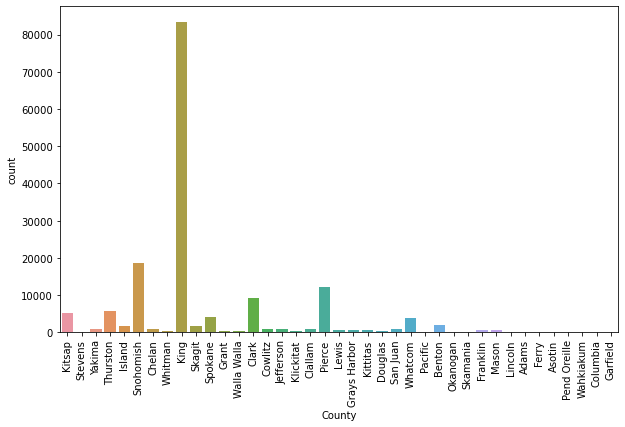

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='County',data=df)
plt.xticks(rotation=90);

Q2.Which make has the highest number of EV's registered?

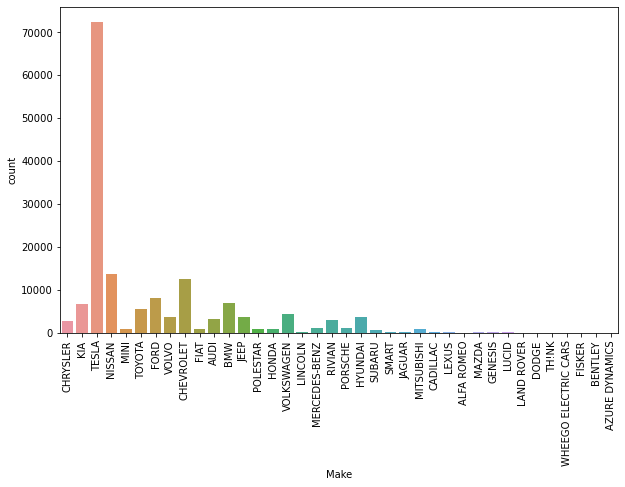

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='Make',data=df)
plt.xticks(rotation=90);

Q3.What is the breakdown of electric vehicle (EV) powertrain configurations, specifically regarding the percentage of EVs utilizing rechargeable battery packs versus those employing a combination of electric and internal combustion engines, as depicted in this figure?

<AxesSubplot:ylabel='Electric Vehicle Type'>

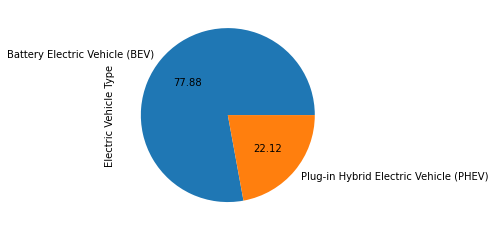

In [12]:
df['Electric Vehicle Type'].value_counts().plot(kind='pie',autopct='%.2f')

Q4.What percentage of vehicles meet the criteria for clean alternative fuel vehicle (CAFV) eligibility, and what proportion are currently in a state of eligibility uncertainty due to unverified battery range, indicating a necessity for further investigation in this domain?

<AxesSubplot:ylabel='Clean Alternative Fuel Vehicle (CAFV) Eligibility'>

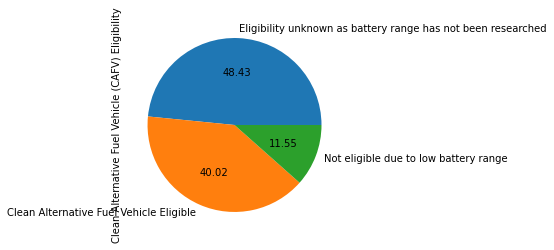

In [13]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind='pie',autopct='%.2f')

Q5.Why are electric vehicles with longer ranges particularly popular in regions characterized as "Ferry" country?

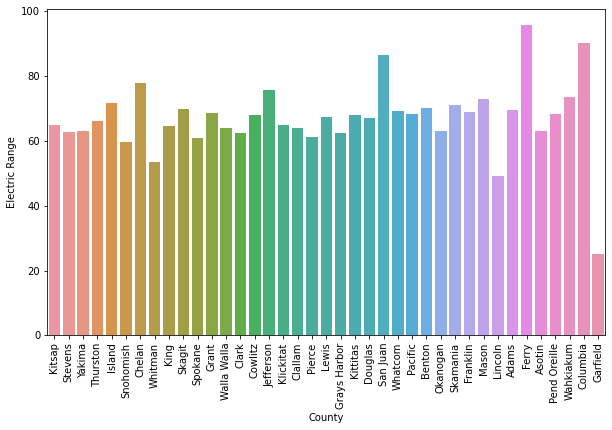

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x='County',y='Electric Range',data=df,ci=None)
plt.xticks(rotation=90);

Q6.What advantage do battery electric vehicles (BEVs) hold over plug-in hybrid electric vehicles (PHEVs) in terms of electric range, and how does this contribute to the ability for extended emission-free driving?

<AxesSubplot:xlabel='Electric Vehicle Type', ylabel='Electric Range'>

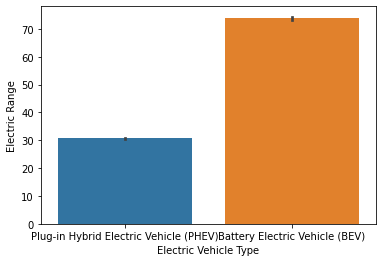

In [15]:
sns.barplot(x='Electric Vehicle Type',y='Electric Range',data=df)

Q7.Why do clean alternative fuel vehicles (CAFVs) tend to have higher electric ranges, and what is the primary rationale behind this design choice, particularly regarding emissions reduction goals?

(array([0, 1, 2]),
 [Text(0, 0, 'Clean Alternative Fuel Vehicle Eligible'),
  Text(1, 0, 'Eligibility unknown as battery range has not been researched'),
  Text(2, 0, 'Not eligible due to low battery range')])

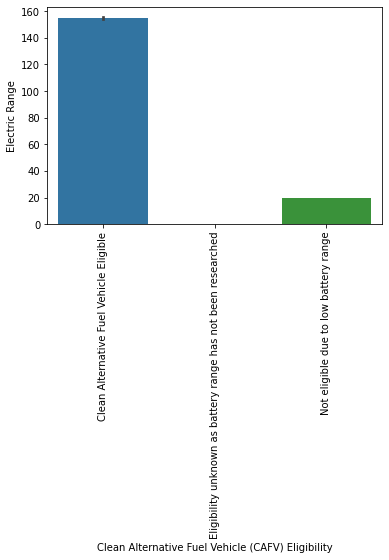

In [16]:
sns.barplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',y='Electric Range',data=df)
plt.xticks(rotation=90)

Q8.Which electric vehicle manufacturer's model boasts the longest range according to the data presented in the figure, and what is the name of the manufacturer?

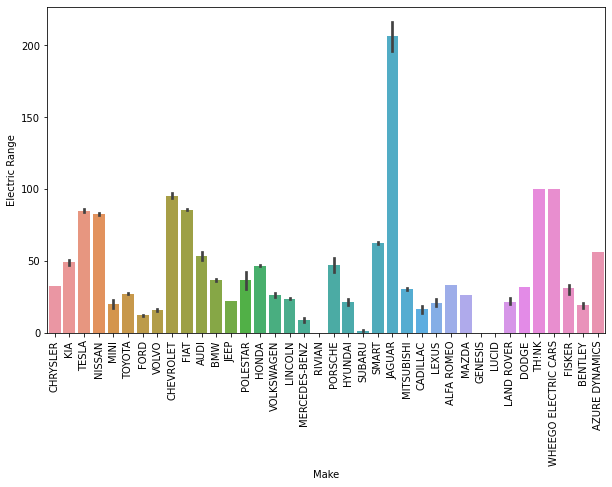

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='Make',y='Electric Range',data=df)
plt.xticks(rotation=90);

Q9.How much has the range of electric vehicles increased from 1997 to 2020, as indicated by the data, 
and what does this increase represent in terms of a numerical ratio?

<AxesSubplot:xlabel='Model Year', ylabel='Electric Range'>

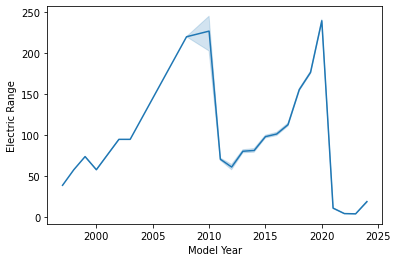

In [18]:
sns.lineplot(x='Model Year',y='Electric Range',data=df)

Q10.Which electric vehicle brand has the highest base manufacturer's suggested retail price (MSRP) compared to its counterparts?

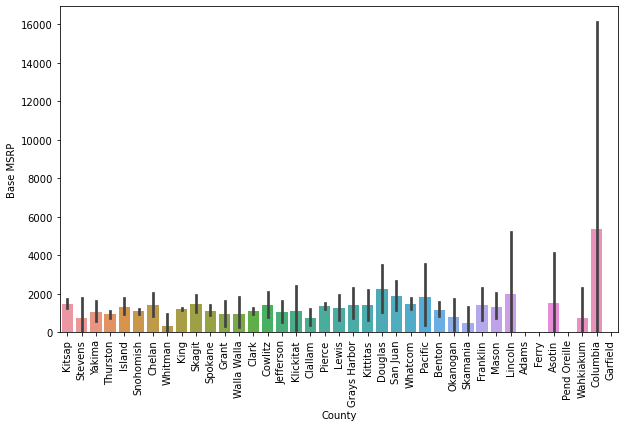

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x='County',y='Base MSRP',data=df)
plt.xticks(rotation=90);

<AxesSubplot:ylabel='Make'>

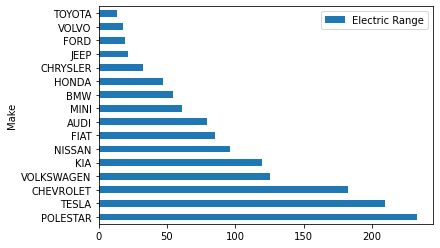

In [20]:
df_continent = df[["Make", "Electric Range"]][:100].groupby("Make").mean().sort_values(by="Electric Range", ascending=False)
#This means the carmaker with the vehicles having the highest average electric range will be at the top.
df_continent.plot(kind='barh')